In [1]:
# Obviously, import needed packages
# Hint: this time, you'll also need Seaborn!
import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Time for practicing Pandas operation using the penguins dataset you worked with last week!

In [5]:
# read in the data
penguins_df = pd.read_csv('penguins_size.csv')
# rename culmen_length_mm to beak_length_mm and culmen_depth_mm to beak_depth_mm
penguins_df.rename(columns={'culmen_length_mm': 'beak_length_mm', 'culmen_depth_mm': 'beak_depth_mm'}, inplace=True)
# remove NaN values
penguins_df = penguins_df.dropna()
# confirm that there are no NaN values
penguins_df.isnull().sum()


species              0
island               0
beak_length_mm       0
beak_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### FROM LAST WEEK, CAN COPY + PASTE:  Read in 'penguins_size.csv' using Pandas, remove NANs.

#### (1)  Print out the entries of penguins with a beak length greater than 36 mm

In [7]:
# print out the entries of penguins_df with a beak_length_mm greater than 36 mm
penguins_df[penguins_df['beak_length_mm'] > 36]

,species,island,beak_length_mm,beak_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
145,Adelie,Dream,39.0,18.7,185.0,3650.0,MALE
146,Adelie,Dream,39.2,18.6,190.0,4250.0,MALE
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE


#### (2)  How many penguins are there in this dataset with a beak length greater than 36 mm?


In [9]:
# How many penguins are there in this dataset with a beak length greater than 36 mm?
print(f"There are {len(penguins_df[penguins_df['beak_length_mm'] > 36])} penguins with a beak length greater than 36 mm.")

There are 121 penguins with a beak length greater than 36 mm.


#### (3)  How many penguins have a beak length greater than 36 mm AND less than 40 mm?

In [10]:
# How many penguins have a beak length greater than 36 mm AND less than 40 mm?
print(f"There are {len(penguins_df[(penguins_df['beak_length_mm'] > 36) & (penguins_df['beak_length_mm'] < 40)])} penguins with a beak length greater than 36 mm AND less than 40 mm.")

There are 71 penguins with a beak length greater than 36 mm AND less than 40 mm.


#### (4)  Create a new column in the dataframe called 'beaker ratio', which consists of the values of beak length divided by values of beak depth.

In [11]:
# Create a new column in the dataframe called 'beaker ratio', which consists of the values of beak length divided by values of beak depth.
penguins_df.eval('beaker_ratio = beak_length_mm / beak_depth_mm', inplace=True)
penguins_df.head()

,species,island,beak_length_mm,beak_depth_mm,flipper_length_mm,body_mass_g,sex,beaker_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2.090909
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2.270115
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2.238889
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.901554
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.907767


#### (5)  Create a scatterplot of body mass vs. flipper length, using the beak length column to control color of scatter plots, and using a colormap of your choice
- it can be very insightful to control color based on values of another variable, in this case another penguin characteristic, yes?
<br><br>
- why don't you also change the colormap from the default? your choice of which new colormap to use

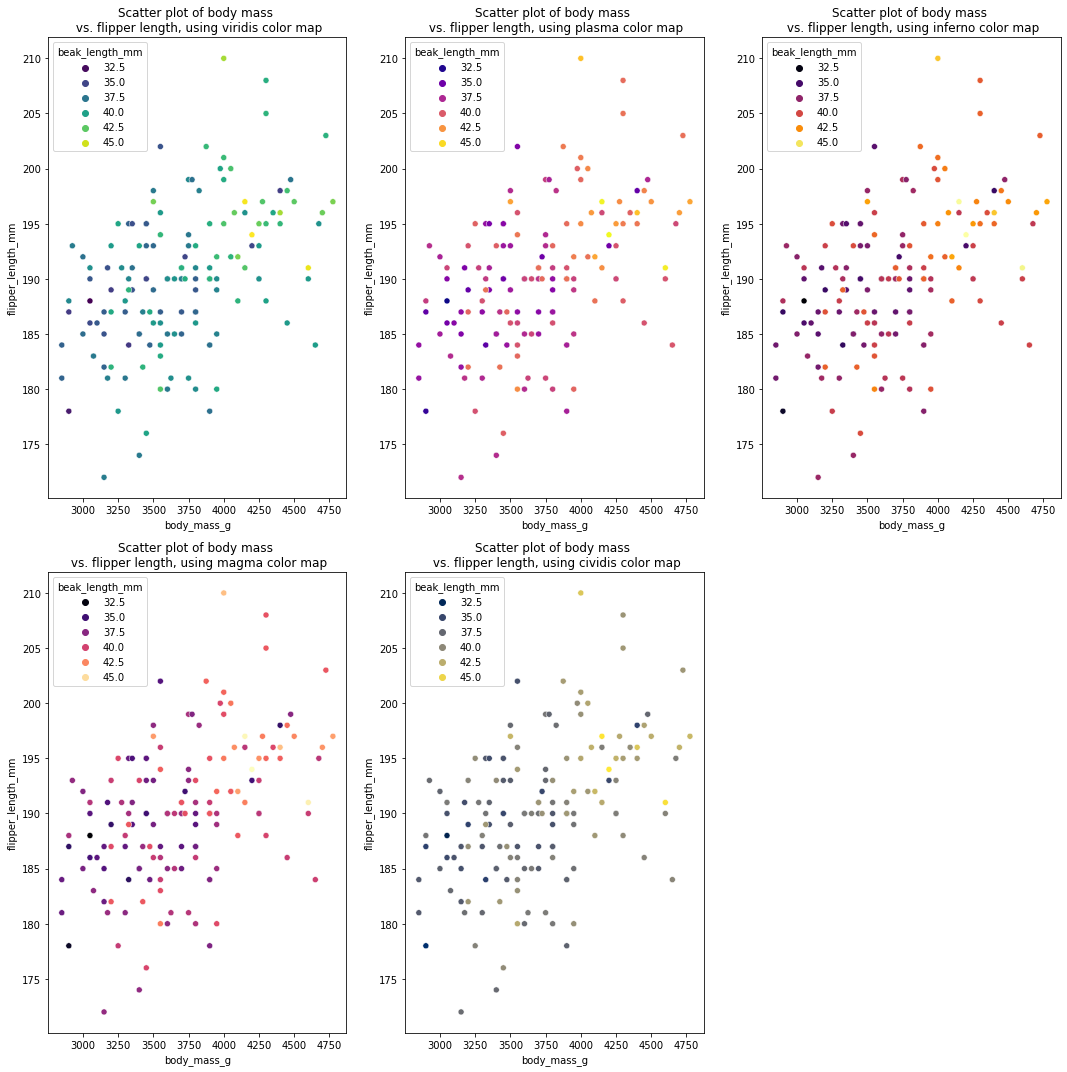

In [18]:
# Create a scatterplot of body mass vs. flipper length, using the beak length column to control color of scatter plots, and using a colormap of your choice
plt.figure(figsize=(15,15))
# list of different color map
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
# create a scatter plot for each color map
for i in range(len(cmaps)):
    plt.subplot(2,3,i+1)
    sb.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='beak_length_mm', data=penguins_df,
                   palette=cmaps[i])
    plt.title(f'Scatter plot of body mass \n vs. flipper length, using {cmaps[i]} color map')
plt.tight_layout()
plt.show()



#### (6)  From your plot in (5), what do you notice about the penguins with shorter beak length?  

* While the penguins with shorter beak length tend to have a smaller body mass, their flipper length seems to distributed in all lengths. 

#### (7) A single scatterplot is interesting, but there's value and convenience in a *scatterplot matrix*, especially in the EDA process.  Create one.
- Please use Seaborn

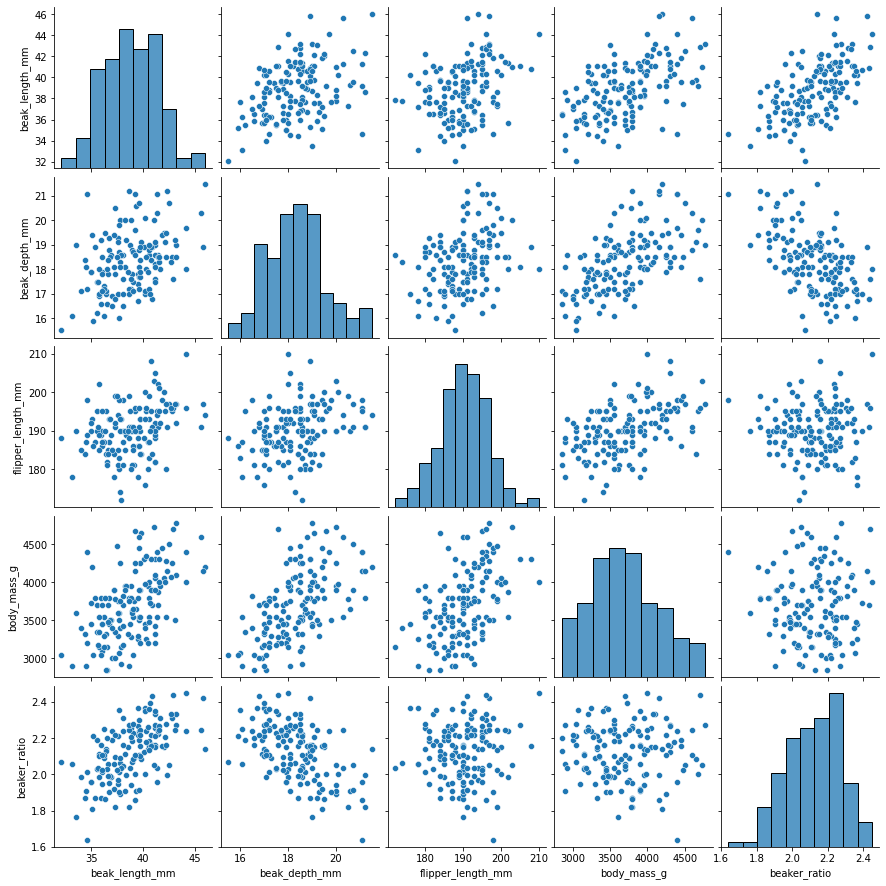

In [19]:
# create scatterplot matrix 
sb.pairplot(penguins_df)
plt.show()

#### (8) And now create a heatmap of CORRELATIONS
- Yes, there's only a few numerical columns, so this will be a small one!
- Please use Seaborn

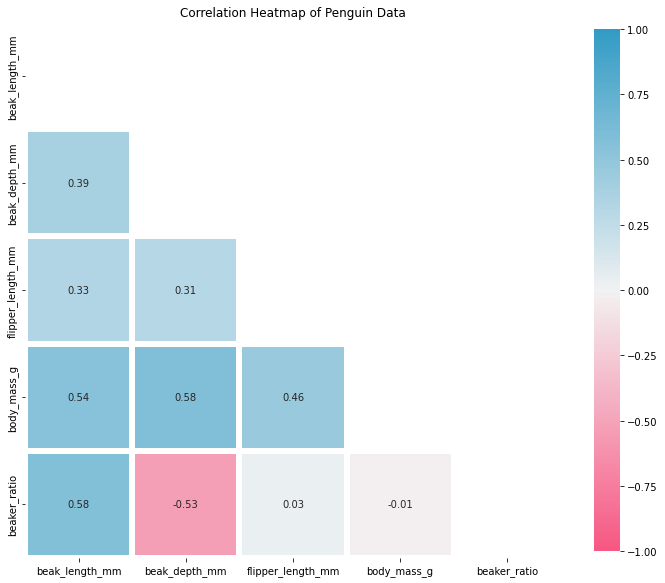

In [23]:
# create a heatmap of correlation between the columns
plt.figure(figsize=(12,12))
penguins_df_corr = penguins_df.corr()
# mask the upper triangle using np.triu() and np.ones_like()
mask = np.triu(np.ones_like(penguins_df_corr, dtype=bool))

# cmap as diverging palette
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

sb.heatmap(penguins_df_corr, mask=mask, annot=True, fmt='.2f', cmap=cmap,
              vmin=-1, vmax=1, linewidths = 5, cbar_kws={"shrink": .8}, square=True)

# title
plt.title('Correlation Heatmap of Penguin Data')
plt.show()


#### (9) Based on your heatmap, which two characteristics have the strongest correlation?

- The two characteristics with the strongest correlation are body mass and beak depth (0.58).

#### (10) Looking back at your scatterplot matrix, comment on what you see in the scatterplot of these two characteristics that have the strongest correlation that you identified in (9) (i.e., anything you notice about the relationship from that scatterplot)

* The two characteristics with the strongest correlation are body mass and beak depth (0.58). 
* In the scatterplot matrix, the relationship between body mass and beak depth is strong, and linear. As body mass increases, the beak depth also increases.